###### UmojaHack Africa

This contains Team Solo's Best solution for the UmojaHack 2023. The UmojaHack Africa intermediate challenge was hosted on Zindi [here](https://zindi.africa/competitions/umojahack-africa-2023-intermediate-challenge)

###### Import Drive to Load dataset

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### Import required Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

###### Load dataset

In [3]:
train = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/UHA23/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/UHA23/Test.csv")
ss = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/UHA23/SampleSubmission.csv")

In [4]:
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [5]:
train.Label.value_counts()

0    6504
1    2404
Name: Label, dtype: int64

<Axes: >

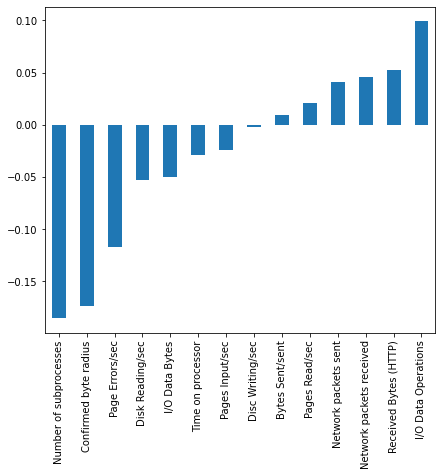

In [6]:
train.corr()['Label'].drop("Label").sort_values().plot(kind='bar', figsize=(7, 6))

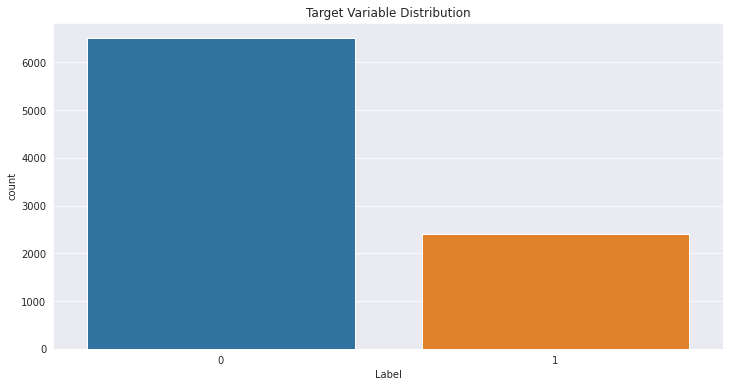

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

In [8]:
target = train.Label
train = train.drop("Label", axis = 1)

In [9]:
data=train.append(test)

<ipython-input-9-df1dd3b34b7c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


In [10]:
data.isnull().sum()

ID                          0
I/O Data Operations         0
 I/O Data Bytes             0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent/sent             0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12726 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        12726 non-null  object 
 1   I/O Data Operations       12726 non-null  float64
 2    I/O Data Bytes           12726 non-null  float64
 3   Number of subprocesses    12726 non-null  float64
 4   Time on processor         12726 non-null  float64
 5   Disk Reading/sec          12726 non-null  float64
 6   Disc Writing/sec          12726 non-null  float64
 7   Bytes Sent/sent           12726 non-null  float64
 8   Received Bytes (HTTP)     12726 non-null  float64
 9   Network packets sent      12726 non-null  float64
 10  Network packets received  12726 non-null  float64
 11  Pages Read/sec            12726 non-null  float64
 12  Pages Input/sec           12726 non-null  float64
 13  Page Errors/sec           12726 non-null  float64
 14  Confirm

In [12]:
data[data['Time on processor']>15]#head(15)

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
844,ID_ILIEQ8CM13,842.324898,3.620080e+06,47.0,16.494205,40.958387,5.644835,3109.014930,81736.22829,19.334670,63.137698,0.844503,0.0,22449.46307,30.862612
1070,ID_WTOVNJX1KD,871.762351,4.123454e+06,47.0,15.977698,30.877927,7.958458,10642.614390,410547.91500,100.258784,293.418112,0.978134,0.0,21740.01684,34.242759
1968,ID_E2PDAB714I,1795.316255,3.951748e+06,44.0,25.246148,35.340267,15.192807,19144.186550,353321.66340,113.957015,288.794874,1.205778,0.0,56769.88579,46.658146
7111,ID_AAPDZ89GVA,1231.030581,5.410029e+05,32.0,18.086928,17.813607,2.477240,7524.098184,625029.06250,56.436029,429.193070,0.112602,0.0,98031.40863,46.784800
7450,ID_RBYXUVPMHN,1469.029821,3.425338e+06,37.0,16.072385,14.193525,3.408838,4364.369344,85956.74393,27.948486,70.548995,1.176149,0.0,17568.59354,25.003165


###### Feature Engineering.

The idea here is to rank cpu usage based on given data points

In [13]:
# Define the ranking function
def rank_4_3_2_1(x):
    # Remove outliers using 3 standard deviations rule
    no_outliers = x[(x - x.mean()).abs() <= 3 * x.std()]
    q1 = no_outliers.quantile(0.25)
    q2 = no_outliers.quantile(0.5)
    q3 = no_outliers.quantile(0.75)
    ranks = pd.Series(index=x.index)
    ranks[x >= q3] = 2
    ranks[(x >= q2) & (x < q3)] = 3
    ranks[(x >= q1) & (x < q2)] = 4
    ranks[x < q1] = 1
    return ranks

# Get a list of the column names
columns = data.drop("ID", axis=1).columns.tolist()

to_remove=[]
# Iterate over each column, rank the values, and add the result to a new column
for col in columns:
    ranks = rank_4_3_2_1(data[col])
    data[f"{col}_rank"] = ranks
    to_remove.append(f"{col}_rank")

# Calculate the sum of the ranks for each column
rank_sums = data.filter(regex="_rank$").sum(axis=1)

# Add the rank sums as a new row to the DataFrame
data["Rank Sum"] = rank_sums
data = data.drop(to_remove, axis=1)

data


<ipython-input-13-03eb8767ebe1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ranks = pd.Series(index=x.index)
<ipython-input-13-03eb8767ebe1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ranks = pd.Series(index=x.index)
<ipython-input-13-03eb8767ebe1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ranks = pd.Series(index=x.index)
<ipython-input-13-03eb8767ebe1>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ranks = pd.Series(index=x.index)
<ipython-input-13-03eb8767ebe1>:8: FutureWarning: The default dtype for empt

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Rank Sum
0,ID_4W8AP96UO6,114.798900,3.790451e+03,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,42.0
1,ID_UD3TM0ZYND,14.154240,5.182452e+03,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,42.0
2,ID_XAG1HC0HWM,0.044444,1.208213e+02,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,30.0
3,ID_CEXD05IR09,31.369916,1.272283e+05,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,29.0
4,ID_X6E97FT8IF,5.046181,1.091620e+03,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,ID_PAWIH292SB,7.290908,3.276107e+03,27.0,0.034732,0.755765,0.000000,66.596217,60.416728,0.955820,0.866907,0.000000,0.0,332.647660,28.937109,45.0
3814,ID_EMPXLFEHRN,12.336515,2.539813e+04,42.0,1.528201,17.115526,1.244766,1401.005811,17492.334080,8.535535,17.737909,0.955802,0.0,15087.869440,28.098248,32.0
3815,ID_437MU86JLQ,4.754111,1.123303e+03,30.0,0.000000,1.932746,0.000000,48.518591,28.702390,0.533171,0.377663,0.044431,0.0,370.087546,31.630495,47.0
3816,ID_TMGB3DFDLX,271.668446,3.287590e+06,33.0,9.429024,11.242224,1.720977,2277.276675,107508.960100,18.371984,81.623461,0.245854,0.0,8097.574777,27.496611,30.0


###### Engineer More Features

In [14]:
data["Speed of Operations to Speed of Data Bytes"] = data["I/O Data Operations"]/data[" I/O Data Bytes"]
data["Time for a single Process"] = data["Time on processor"]/data["Number of subprocesses"]


data["Ratio of data flow"] = data["Received Bytes (HTTP)"]/data["Bytes Sent/sent"]
data["Ratio of Packet flow"] = data["Network packets received"]/data["Network packets sent"]


data["Total Page Errors"] = data["Time on processor"] * data["Page Errors/sec"]
#data["Read to write comparision"] = data["Disk Reading/sec"]/ data["Disc Writing/sec"]


# Create the Network Usage feature
data["Network Usage"] = data["Bytes Sent/sent"] + data["Received Bytes (HTTP)"]


# Create the Network Activity Rate feature
data["Network Activity Rate"] = data["Network packets sent"] + data["Network packets received"]

# Create the Page Fault Rate feature
data["Page Fault Rate"] = (data["Pages Read/sec"] + data["Pages Input/sec"]) / data["Page Errors/sec"]

# Create the Network Latency feature
data["Network Latency"] = data["Network packets sent"] - data["Network packets received"]

# Create the Disk Latency feature
data["Disk Latency"] = (data["Disk Reading/sec"] + data["Disc Writing/sec"]) / data["I/O Data Operations"]


In [15]:
data = data.drop(["Disc Writing/sec","Pages Input/sec"], axis=1)

In [16]:
data['Time on processor'].describe()

count    12726.000000
mean         0.488521
std          1.551592
min          0.000000
25%          0.000000
50%          0.034734
75%          0.451386
max         25.246148
Name: Time on processor, dtype: float64

In [17]:
train.shape, test.shape

((8908, 15), (3818, 15))

In [18]:
data = data.drop(["ID"], axis=1)

In [19]:
train=data.iloc[:train.shape[0],]
test= data.iloc[train.shape[0]:,]
y = target

###### Data Modelling

In [20]:
!pip install catboost -qq

In [21]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

###### Training the model with a stratified KFold

In [22]:
from sklearn.model_selection import StratifiedKFold


predictions = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(train,y):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2 = LGBMClassifier(**params)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    score = f1_score(Y_test,preds)
    scores.append(score)
    print("F1: ", score) 
    predictions.append(classifier2.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

F1:  0.9708333333333333
F1:  0.9552238805970149
F1:  0.957983193277311
F1:  0.975103734439834
F1:  0.951578947368421
F1:  0.9768421052631578
F1:  0.9642105263157894
F1:  0.9725158562367865
F1:  0.968421052631579
F1:  0.9659574468085107
0.9658670076271738


###### The Feature Importance Plot

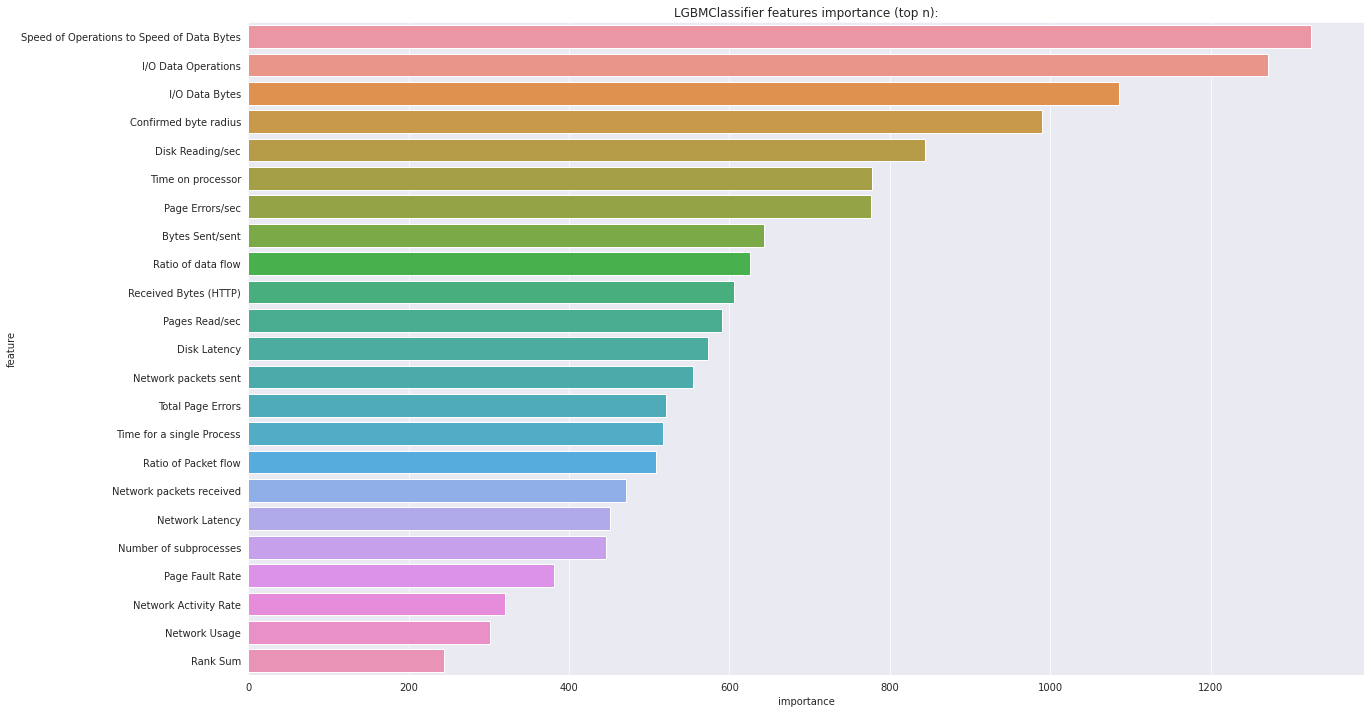

In [23]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

###### Ensembling the Out Of Fold Predictions by taking the Mode

In [24]:
sub = ss.copy()
sub.head()
predictions = pd.DataFrame(predictions)
predictions.T.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0


In [25]:
predictions = predictions.mode()
predictions = predictions.T
predictions

,0,1
0,0.0,NaN
1,0.0,NaN
2,1.0,NaN
3,1.0,NaN
4,0.0,NaN
...,...,...
3813,0.0,NaN
3814,0.0,NaN
3815,1.0,NaN
3816,0.0,NaN


###### Making a submission

In [26]:
sub["Target"] = predictions[0]
sub["ID"] = pd.read_csv("/content/drive/MyDrive/machine_learning_stories/UHA23/Test.csv").ID
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0.0
1,ID_KUTY5K1G5F,0.0
2,ID_H6PJWKU831,1.0
3,ID_DNQXNVTXHE,1.0
4,ID_8CRTF1BJOD,0.0


In [27]:
sub["Target"].value_counts()

0.0    2824
1.0     994
Name: Target, dtype: int64

In [28]:
name = "Confirm 994 Reproduced score.csv"
sub.to_csv(name, index=False)
from google.colab import files
files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###### The End

###### How did we get our hyperparameters? - we used Optuna

In [ ]:
X = train.copy()
from lightgbm import early_stopping, log_evaluation

def objective(trial):
    fold_pred=[]
    oof_pred = []


    param = {}
    param['objective'] = "binary"

    param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
     #param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
     #param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
    param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 2,6)
    param['n_estimators'] = trial.suggest_int('n_estimators', 400,1200)




    fold=StratifiedKFold(n_splits=8,shuffle=True, random_state=42) #15#5#10 
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # m2 = CatBoostRegressor(**param)
        m2 = LGBMClassifier(**param)

        m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], callbacks=[log_evaluation(1200)])#erly100
        preds=m2.predict(X_test)
        oof_pred.append(f1_score(y_test,preds))

    return np.mean(oof_pred)


In [ ]:
#!pip install optuna -qq

In [ ]:
import optuna

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

[I 2023-03-18 19:02:54,393] A new study created in memory with name: no-name-96aa1706-ce5a-4c90-8487-09051f2aa423
[I 2023-03-18 19:03:02,935] Trial 0 finished with value: 0.9600328813546216 and parameters: {'learning_rate': 0.054640215017004584, 'subsample': 0.9295912733182314, 'colsample_bytree': 0.28575303928097145, 'max_depth': 6, 'scale_pos_weight': 2, 'n_estimators': 705}. Best is trial 0 with value: 0.9600328813546216.
[I 2023-03-18 19:03:14,889] Trial 1 finished with value: 0.9523897978578704 and parameters: {'learning_rate': 0.012829271575406781, 'subsample': 0.27621958420575826, 'colsample_bytree': 0.5631955732584384, 'max_depth': 14, 'scale_pos_weight': 3, 'n_estimators': 536}. Best is trial 0 with value: 0.9600328813546216.
[I 2023-03-18 19:03:39,426] Trial 2 finished with value: 0.961859919949704 and parameters: {'learning_rate': 0.01671388563981043, 'subsample': 0.33349310117178793, 'colsample_bytree': 0.839023614219209, 'max_depth': 10, 'scale_pos_weight': 3, 'n_estimator

In [ ]:
trial.params   #best params